# Classificação de plantas
dataset Iris
5. Number of Instances: 150 (50 in each of three classes)

6. Number of Attributes: 4 numeric, predictive attributes and the class

7. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

8. Missing Attribute Values: None

## carregamento da base

In [1]:
import pandas as pd
df = pd.read_csv("../datasets/iris/iris.data", names=["sepal length", "sepal width", "petal length", "petal width", "class"])

## análise exploratória

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Visualização gráfica dos atributos

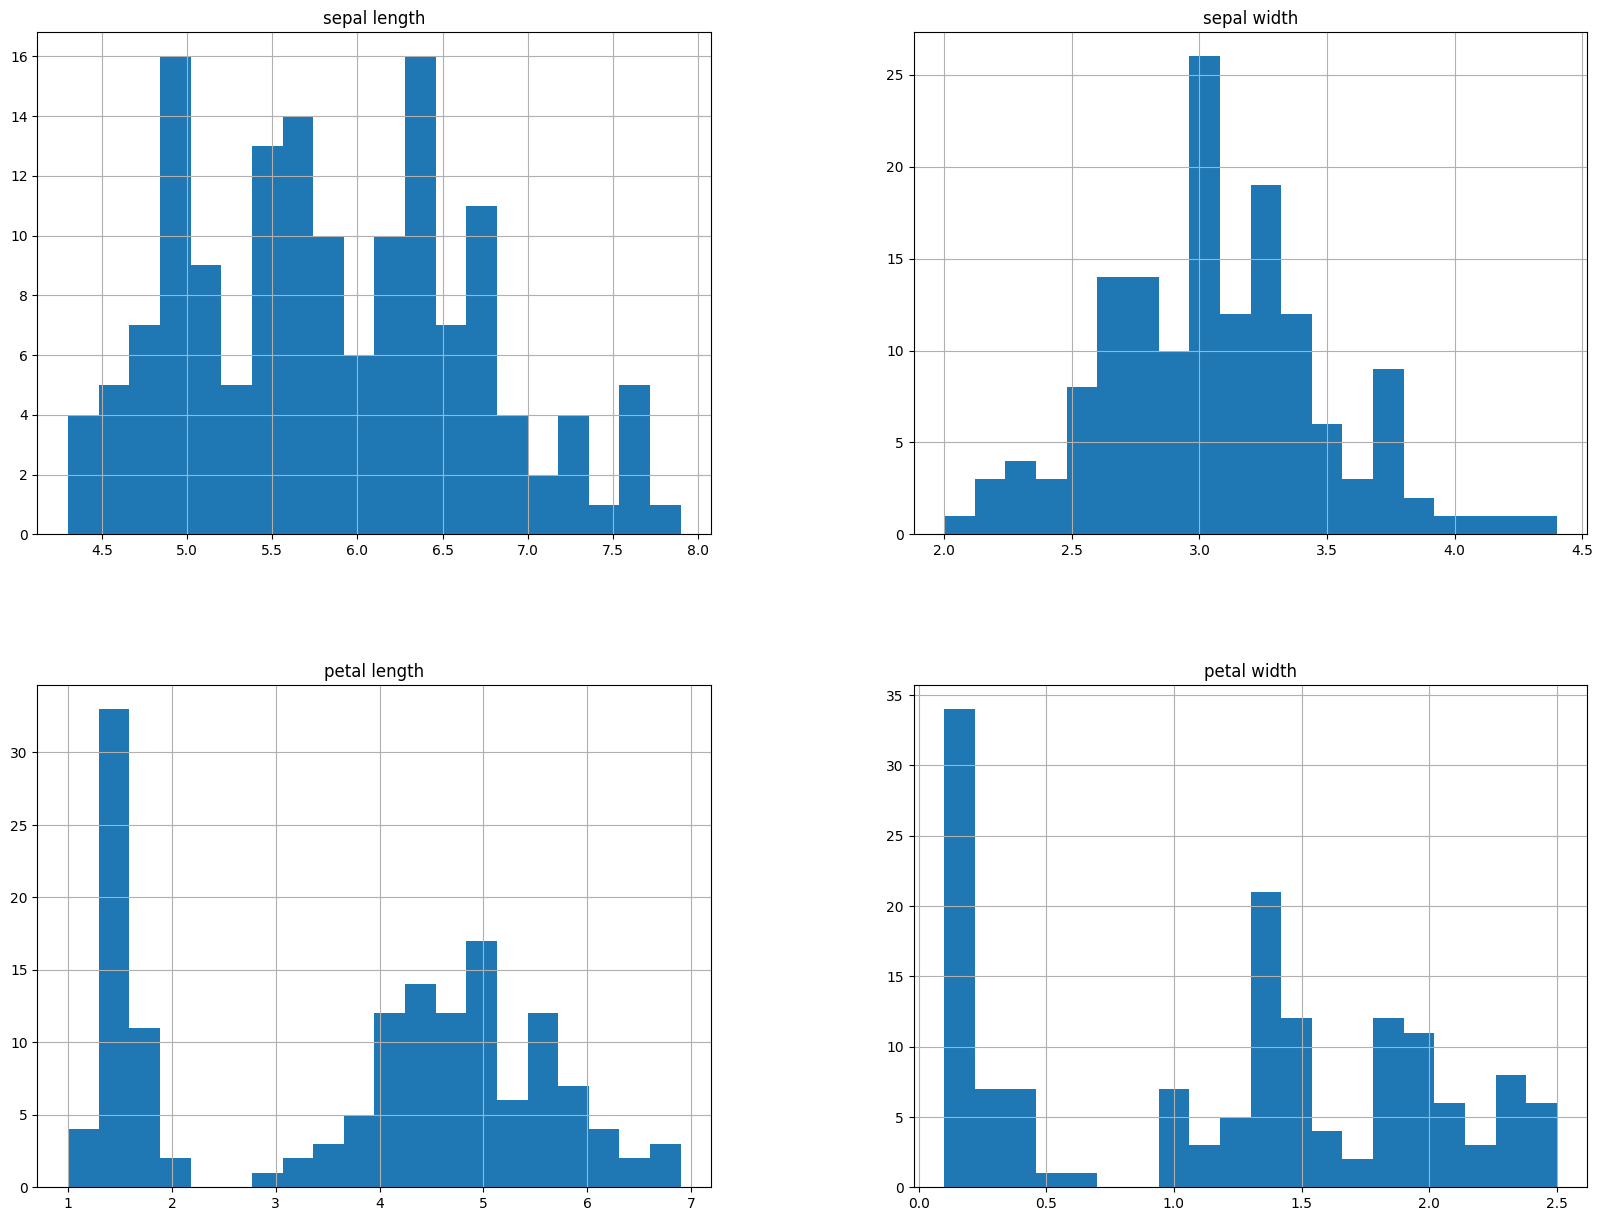

In [7]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

In [8]:
df_num = df.drop(['class'], axis=1)
corr = df_num.corr()
corr

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


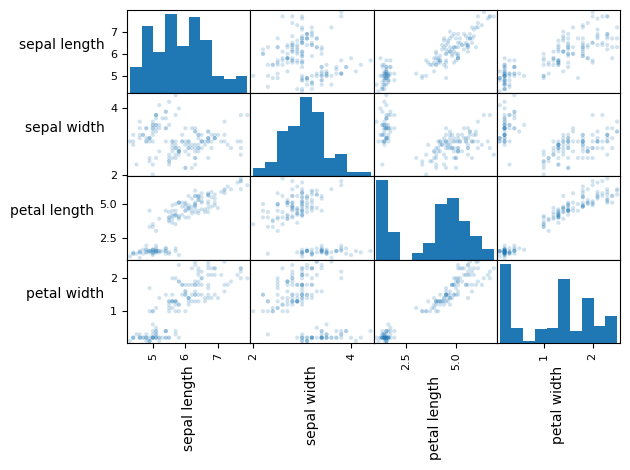

In [9]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

## pré-processamento dos dados

In [10]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ["sepal length", "sepal width", "petal length", "petal width"]
cat_attribs = ["class"]

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs) 
])

data = full_pipeline.fit_transform(df)

## preparação dos dados

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

X = data[:, :3]
y = data[:, 4]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

## Modelos de classificação

### Regressão logística

In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
log_reg_pred = log_reg.predict(X_test)

In [53]:
log_reg.score(X_test, y_test)

0.9333333333333333

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
score_lr = accuracy_score(y_test, log_reg_pred)
matrix = confusion_matrix(y_test, log_reg_pred)

In [55]:
score_lr

0.9333333333333333

In [18]:
matrix

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 10]])

### SVM

In [56]:
from sklearn.svm import SVC
svc = SVC(kernel="sigmoid", C=0.4, gamma='auto')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
score_svm = accuracy_score(y_test, y_pred_svc)
matrix = confusion_matrix(y_test, y_pred_svc)


In [57]:
score_svm

0.9333333333333333

In [21]:
matrix

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 10]])

### Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=2)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
score_r = accuracy_score(y_test, y_pred_forest)
matrix = confusion_matrix(y_test, y_pred_forest)

In [62]:
score

0.9666666666666667

In [63]:
matrix

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 11]])

## ajuste de hiperparâmetros com grid search

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [30, 50, 80, 100, 120], 'max_features': [2, 4], 'max_depth': [3, 5, 10]},
    {'bootstrap': [False], 'n_estimators': [30, 50, 80, 100, 120], 'max_features': [2, 4], 'max_depth': [3, 5, 10]}
]

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...estimators=30)
,param_grid,"[{'max_depth': [3, 5, ...], 'max_features': [2, 4], 'n_estimators': [30, 50, ...]}, {'bootstrap': [False], 'max_depth': [3, 5, ...], 'max_features': [2, 4], 'n_estimators': [30, 50, ...]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,50


## comparação dos modelos avaliados

In [64]:
lr_results = pd.DataFrame(['Regressão Logística', score_lr]).transpose()
lr_results.columns = ["Método", "Acurácia"]

svm_results = pd.DataFrame(['SVM', score_svm]).transpose()
svm_results.columns = ["Método", "Acurácia"]

forest_results = pd.DataFrame(['Florest Randômca', score_r]).transpose()
forest_results.columns = ["Método", "Acurácia"]

In [67]:
df_results = pd.concat([lr_results, svm_results, forest_results]).reset_index().drop(['index'], axis=1)
df_results

,Método,Acurácia
0,Regressão Logística,0.933333
1,SVM,0.933333
2,Florest Randômca,0.966667


## salvar modelos aprendidos

In [68]:
from pickle import dump
with open("../models/iris_classifier.pkl", "wb") as f:
    dump(forest, f, protocol=5)